In [1]:
sh_init

init done


On originals (mel-log):<br>
Test loss: 0.10262402041815222<br>
Test accuracy: 0.96875<br>

On mfcc:<br>
Test loss: 0.11605379821034148<br>
Test accuracy: 0.96975<br>

In [1]:
import os, sys

from scipy.fftpack import dct

import librosa
import librosa.display
import IPython.display

from predict import *
from preprocess import *
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Using TensorFlow backend.


In [5]:
# A function for restoring audio by a mel-spectrogram.
# Some information is lost in mel - no phase for each of the frequencies
# (16kHZ sample rate also implies loss).
# So the output quality is very poor, but we can hear speach and intonation -
# thus, get overall notion for a recording.
from recover_audio import recover_audio_from_sample

In [6]:
datadir = '/Users/Sharkow/ML_Data/NDL/'

In [7]:
sample_path = datadir + 'train/clean/20/20_205_20-205-0004.npy'
IPython.display.Audio(data=recover_audio_from_sample(sample_path), rate=16000)

In [74]:
train_clean_path = '/Users/Sharkow/ML_Data/panotti/Preproc/mfcc/Train/clean'
train_noisy_path = '/Users/Sharkow/ML_Data/panotti/Preproc/mfcc/Train/noisy'
test_clean_path = '/Users/Sharkow/ML_Data/panotti/Preproc/mfcc/Test/clean'
test_noisy_path = '/Users/Sharkow/ML_Data/panotti/Preproc/mfcc/Test/noisy'

In [9]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

def flatten_dir(dir_to_flatten):
    for dirpath, dirnames, filenames in os.walk(dir_to_flatten):
        for filename in filenames:
            try:
                os.rename(os.path.join(dirpath, filename), os.path.join(dir_to_flatten, filename))
            except OSError:
                print ("Could not move %s " % os.path.join(dirpath, filename))

In [10]:
train_clean_files = getListOfFiles(train_clean_path)

In [11]:
def check_mel_sizes(path):
    files = get_npy_files(path)
    for file in files:
        sample = np.load(file)
        check_mel_size(sample)

In [78]:
switch_to_mfcc(train_clean_path)
switch_to_mfcc(train_noisy_path)
switch_to_mfcc(test_clean_path)
switch_to_mfcc(test_noisy_path)

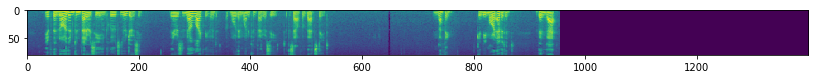

In [25]:
sample_path = train_clean_files[12]
sample = np.load(sample_path).astype('float64') 
#librosa.display.specshow(sample, x_axis='time', y_axis='mel')
plt.figure(figsize=(14,3))
plt.imshow(sample.reshape(1400, 80).T)

In [47]:
sample_mfcc = make_mfcc(sample.reshape(1400, 80))
sample_mfcc = lifter(sample_mfcc)

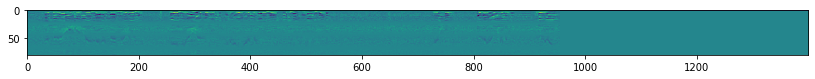

In [48]:
plt.figure(figsize=(14,3))
plt.imshow(sample_mfcc.T)

In [36]:
sample_mfcc.shape

(1400, 80)

In [34]:
sample_mfcc = lifter(sample_mfcc)

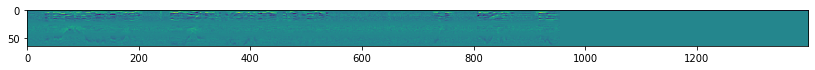

In [68]:
plt.figure(figsize=(14,3))
plt.imshow(sample_mfcc[:,:64].T)

In [38]:
sample_mfcc[:,:16].shape

(1400, 16)